In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time

plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
data=pd.read_csv("../Data/smart_farm_final.csv")
data.drop(["시간","월","일","시","분"], axis=1, inplace=True)
data.shape

(148168, 52)

In [24]:
data.columns

Index(['년도', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)', '풍향(º)', '내부 온도',
       '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)', '에너지스크린(수직)', '배기팬',
       '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(kWh)',
       '누적강수량', '현지기압', '해면기압', '일조', '년월일', 'PM10_1시간', 'PM25_1시간', '오존_1시간',
       '이산화질소_1시간', '일산화탄소_1시간', '아황산가스_1시간', '차광스크린_개방', '차광스크린_광도조절',
       '차광스크린_개방조절', '차열스크린_온도조절', '차열스크린_광도조절', '차열스크린_개방조절', '일출시간', '일몰시간',
       '일출3시간후', '일출1시간후', '일몰3시간후', '일몰1시간반전', '하루길이', '시간범주', '일몰전후', '일출일몰',
       '지면온도', '오존등급', '아황산가스등급', '이산화질소등급', 'PM10등급', 'PM25등급'],
      dtype='object')

In [5]:
# 문자열 형식의 컬럼만 추출하기
object_lst = []

# 숫자 형식의 컬럼만 추출하기
num_lst = []

for col in data.columns:
    if data[col].dtype == "object":
        object_lst.append(col)
    
    else:
        num_lst.append(col)

In [6]:
data_scaled = data.copy()

# 근데 스케일링 해서 학습하면 단일 값에 대해 실시간으로 처리할 때 어떻게 처리함..?
num_lst_nodate = [x for x in num_lst if x not in ["년도", "배기팬","유동팬","팬코일 B동","환기온도(천창 제어온도)","내부 온도"]]

loglist=[]
# 왜도 3 이상인 설명변수 log1p 변환
for val in num_lst_nodate:
    if abs(data_scaled[val].skew())>3:
        data_scaled[val] = np.log1p(data_scaled[val])
        loglist.append(val)
loglist

['천창', '누적강수량', '아황산가스_1시간']

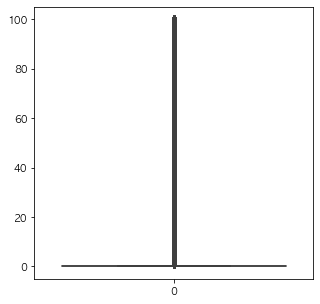

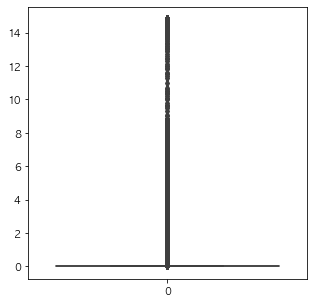

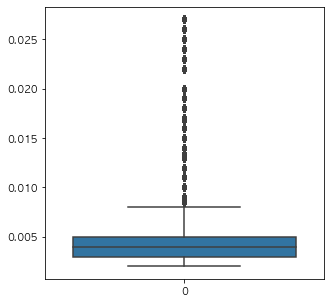

In [7]:
for log in loglist:
  plt.figure(figsize= (5,5))
  sns.boxplot(data= data[log])

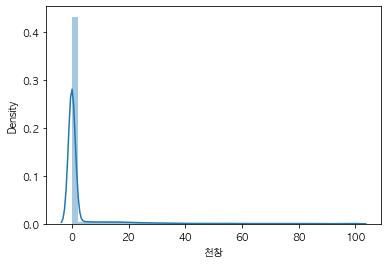

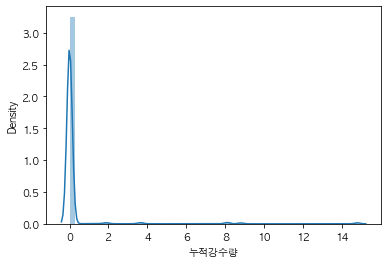

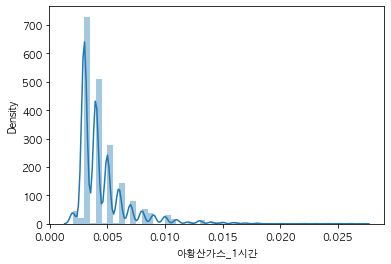

In [8]:
for log in loglist:
    sns.distplot(data[log])
    plt.show()

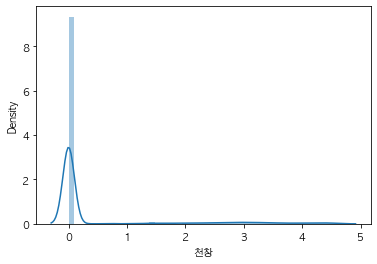

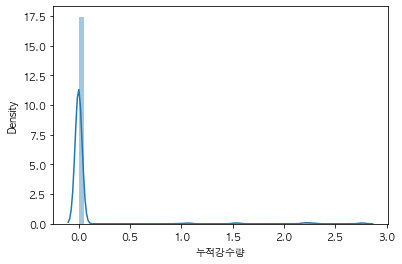

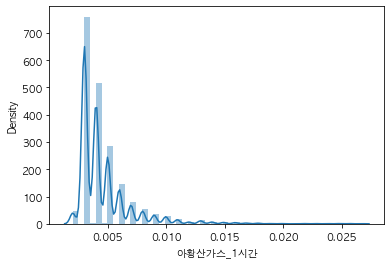

In [9]:
for log in loglist:
    sns.distplot(data_scaled[log])
    plt.show()

In [10]:
# 근데 스케일링 해서 학습하면 단일 값에 대해 실시간으로 처리할 때 어떻게 처리함..?

# from sklearn.preprocessing import StandardScaler

# for col in num_lst_nodate:
#     std = StandardScaler()

#     data_scaled[col] = std.fit_transform(data_scaled[col].values.reshape(-1,1))

In [11]:
Y = data_scaled["내부 온도"]

X_dummy = pd.get_dummies(data_scaled.drop(["년월일","내부 온도"],axis=1)
                         ,columns=['차광스크린_광도조절',
                                    '차광스크린_개방조절',
                                    '차열스크린_온도조절',
                                    '차열스크린_광도조절',
                                    '차열스크린_개방조절',
                                    '시간범주',
                                    '일몰전후',
                                    '일출일몰',
                                    '오존등급',
                                    '아황산가스등급',
                                    '이산화질소등급',
                                    'PM10등급',
                                    'PM25등급',
                                    '배기팬',
                                    '유동팬',
                                    '팬코일 B동',
                                    '환기온도(천창 제어온도)',
                                    '차광스크린_개방'])

In [12]:
len(X_dummy.columns)

78

In [13]:
data_scaled_final = pd.concat([X_dummy, Y], axis = 1)
data_scaled_final.shape

(148168, 79)

In [33]:
data_scaled_final = pd.concat([X_dummy, Y], axis = 1)


train_data = data_scaled_final.iloc[:100000,:]
test_data = data_scaled_final.iloc[100000:129448:,:]

# 열공급량 없어서 다시 나눔
# train_data = data_scaled_final.iloc[:129448,:]
# test_data = data_scaled_final.iloc[129448:,:]

In [34]:
train_data=sm.add_constant(train_data, has_constant = "add")
test_data=sm.add_constant(test_data, has_constant = "add")
train_data.drop(['열공급량(kWh)'], axis=1, inplace=True)
test_data.drop(['열공급량(kWh)'], axis=1, inplace=True)

In [35]:
train_data.to_csv("../Data/smart_farm_final_dummied_train.csv", index=False)
test_data.to_csv("../Data/smart_farm_final_dummied_test.csv", index=False)


In [36]:
x_train = train_data.drop(["내부 온도"],axis=1)
y_train = train_data["내부 온도"]


x_test = test_data.drop(["내부 온도"],axis=1)
y_test = test_data["내부 온도"]

In [37]:
full_model = sm.OLS(y_train,x_train)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.585e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:19:38   Log-Likelihood:            -1.0224e+05
No. Observations:              100000   AIC:                         2.046e+05
Df Residuals:                   99944   BIC:                         2.051e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0032      0.000     12.695      0.000       0.003       0.004
년도                       -0.1528      0.012    -13.230      0.000      -0.175      -0.130
일사량(W/㎡)                  0.0034   3.52e-05     96.551      0.000       0.003       0.003
외기온(℃)                    0.1454      0.001    102.883      0.000       0.143       0.148
외기습도(%)                  -0.0020      0.000     -8.362      0.000      -0.003      -0.002
풍속(m/s)                  -0.0283      0.002    -14.911      0.000      -0.032      -0.025
풍향(º)                    -0.0002   1.86e-05     -9.762      0.000      -0.000      -0.000
내부 습도                    -0.0315      0.000    -72.775      0.000      -0.032      -0.031
차광스크린(수평)                 0.0048      0.001      4.820      0.000       0.003       0.007
차열스크린(수평)                -0.0044      0.001     -4.214      0.000      -0.006      -0.002
에너지스크린(수평)                0.0081      0.000     41.434      0.000       0.008       0.009
에너지스크린(수직)                0.0067      0.000     40.170      0.000       0.006       0.007
천창                       -0.1020      0.004    -22.679      0.000      -0.111      -0.093
난방온도(설정온도)                0.7284      0.004    161.985      0.000       0.720       0.737
누적강수량                    -0.2630      0.009    -29.011      0.000      -0.281      -0.245
현지기압                      2.0003      0.065     30.640      0.000       1.872       2.128
해면기압                     -2.0135      0.065    -30.999      0.000      -2.141      -1.886
일조                     4.783e-06   2.64e-07     18.145      0.000    4.27e-06     5.3e-06
PM10_1시간                 -0.0151      0.001    -24.189      0.000      -0.016      -0.014
PM25_1시간                  0.0246      0.001     30.344      0.000       0.023       0.026
오존_1시간                  -18.3513      0.539    -34.024      0.000     -19.408     -17.294
이산화질소_1시간               -15.2534      0.661    -23.083      0.000     -16.549     -13.958
일산화탄소_1시간                 0.2292      0.024      9.385      0.000       0.181       0.277
아황산가스_1시간               -20.8074      1.214    -17.139      0.000     -23.187     -18.428
일출시간                     -0.4114      0.033    -12.370      0.000      -0.477      -0.346
일몰시간                     -0.4694      0.037    -12.526      0.000      -0.543      -0.396
일출3시간후                    0.5402      0.042     12.953      0.000       0.458       0.622
일출1시간후                   -0.0942      0.008    -11.386      0.000      -0.110      -0.078
일몰3시간후                    0.4822      0.037     12.863      0.000       0.409       0.556
일몰1시간반전                  -0.0040      0.000    -15.441      0.000      -0.005      -0.004
하루길이                      0.0008      0.000      3.965      0.000       0.000       0.001
지면온도                   

In [38]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif["features"] = train_data.columns
vif[vif['VIF Factor']>=10]

,VIF Factor,features
2,11.849919,일사량(W/㎡)
3,12.792496,외기온(℃)
8,495.444382,차광스크린(수평)
9,569.926794,차열스크린(수평)
10,15.716607,에너지스크린(수평)
...,...,...
74,inf,환기온도(천창 제어온도)_28
75,inf,환기온도(천창 제어온도)_30
76,inf,차광스크린_개방_0
77,inf,차광스크린_개방_1


In [ ]:
vif10 = np.array(vif[vif['VIF Factor']<=10]['features'])
np.save('../Data/vif10.npy',vif10)

In [ ]:
# x_train.drop(vif_list, axis=1, inplace=True)
# x_test.drop(vif_list, axis=1, inplace=True)

In [ ]:
# X_train = sm.add_constant(x_train)
# model = sm.OLS(y_train, X_train).fit()
# print(model.summary())

In [ ]:
# def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
#     import statsmodels.api as sm
#     import matplotlib.pyplot as plt
#     import warnings
#     warnings.filterwarnings("ignore")
    
#     y = y_train ## 반응 변수

#     selected_variables = [] ## 선택된 변수들
#     sl_enter = 0.05
#     sl_remove = 0.05
    
#     sv_per_step = [] ## 각 스텝별로 선택된 변수들
#     adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
#     steps = [] ## 스텝
#     step = 0
#     while len(variables) > 0:
#         remainder = list(set(variables) - set(selected_variables))
#         pval = pd.Series(index=remainder) ## 변수의 p-value
#         ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
#         ## 선형 모형을 적합한다.
#         for col in remainder: 
#             X = X_train[selected_variables+[col]]
#             X = sm.add_constant(X)
#             model = sm.OLS(y,X).fit(disp=0)
#             pval[col] = model.pvalues[col]
    
#         min_pval = pval.min()
#         if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
#             selected_variables.append(pval.idxmin())
#             ## 선택된 변수들에대해서
#             ## 어떤 변수를 제거할지 고른다.
#             while len(selected_variables) > 0:
#                 selected_X = X_train[selected_variables]
#                 selected_X = sm.add_constant(selected_X)
#                 selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
#                 max_pval = selected_pval.max()
#                 if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
#                     remove_variable = selected_pval.idxmax()
#                     selected_variables.remove(remove_variable)
#                 else:
#                     break
            
#             step += 1
#             steps.append(step)
#             adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
#             adjusted_r_squared.append(adj_r_squared)
#             sv_per_step.append(selected_variables.copy())
#         else:
#             break

#     fig = plt.figure(figsize=(100,10))
#     fig.set_facecolor('white')
    
#     font_size = 15
#     plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
#     plt.plot(steps,adjusted_r_squared, marker='o')
      
#     plt.ylabel('Adjusted R Squared',fontsize=font_size)
#     plt.grid(True)
#     plt.show()

#     return selected_variables

# selected_variables = stepwise_feature_selection(X_train, y_train)

In [ ]:
# model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0)
# print(model.summary())

In [ ]:
# # pca components 5, 10, 15, 20, 25
# from sklearn.decomposition import PCA

# for i in range(5, 25, 5):
#     pca = PCA(n_components = i)
#     principalComponents = pca.fit_transform(x_train)
#     principalDf = pd.DataFrame(data = principalComponents)
#     finalDataFrame = pd.concat([principalDf, y_train], axis=1)
#     finalDataFrame.to_csv("../Data/pca"+str(i)+".csv")

In [39]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [40]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']),k) :
		# 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model
    

In [41]:
### 전진석택법(step=1)

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", str(toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
      Forward_result = forward(X=X,y=y,predictors=predictors)
      if (i > 1):
        if Forward_result["AIC"] > Fmodel_before:
            break
      Fmodels.loc[i] = Forward_result
      predictors = Fmodels.loc[i]["model"].model.exog_names
      Fmodel_before = Fmodels.loc[i]["AIC"]
      predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
		

In [42]:
Forward_best_model = forward_model(X=x_train, y=y_train)

Processed  77 models on 1 predictors in 0.6059830188751221
Selected predictors: ['차열스크린_온도조절_23도미만', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbe709c90d0>
Processed  76 models on 2 predictors in 0.9816439151763916
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbe70991760>
Processed  75 models on 3 predictors in 0.8192770481109619
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbe70991e20>
Processed  74 models on 4 predictors in 1.1519100666046143
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', '일사량(W/㎡)', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbe703b0d90>
Processed  73 models on 5 predictors in 1.3275179862976074
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온

In [43]:
Forward_best_model.aic

204584.03474822885

In [44]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.907e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:24:22   Log-Likelihood:            -1.0224e+05
No. Observations:              100000   AIC:                         2.046e+05
Df Residuals:                   99947   BIC:                         2.051e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
차열스크린_온도조절_23도미만         -3.8029      0.018   -211.178      0.000      -3.838      -3.768
난방온도(설정온도)                0.7287      0.004    162.262      0.000       0.720       0.738
외기온(℃)                    0.1455      0.001    103.179      0.000       0.143       0.148
일사량(W/㎡)                  0.0034   3.51e-05     96.685      0.000       0.003       0.003
차열스크린_온도조절_23도~25도       -1.8359      0.015   -120.899      0.000      -1.866      -1.806
환기온도(천창 제어온도)_27         -0.0879      0.016     -5.581      0.000      -0.119      -0.057
에너지스크린(수직)                0.0067      0.000     40.698      0.000       0.006       0.007
내부 습도                    -0.0314      0.000    -72.862      0.000      -0.032      -0.031
차열스크린_개방조절_100%개방         0.4979      0.034     14.841      0.000       0.432       0.564
차열스크린_온도조절_25도~26도       -0.7358      0.014    -52.784      0.000      -0.763      -0.708
시간범주_야간                   0.2872      0.013     22.341      0.000       0.262       0.312
일출1시간후                    0.0346      0.001     42.908      0.000       0.033       0.036
배기팬_1                    -0.4299      0.013    -33.134      0.000      -0.455      -0.404
일몰전후_일몰1시간반_전            -0.6209      0.018    -35.228      0.000      -0.655      -0.586
에너지스크린(수평)                0.0081      0.000     41.781      0.000       0.008       0.008
일몰3시간후                    0.0128      0.000     48.699      0.000       0.012       0.013
시간범주_그외                   0.1612      0.018      9.100      0.000       0.126       0.196
팬코일 B동_0.0                0.1538      0.006     26.725      0.000       0.143       0.165
일몰1시간반전                  -0.0040      0.000    -15.453      0.000      -0.005      -0.004
PM10등급_좋음                 0.1843      0.008     22.034      0.000       0.168       0.201
차광스크린(수평)                 0.0048      0.000     21.866      0.000       0.004       0.005
PM25_1시간                  0.0247      0.001     30.555      0.000       0.023       0.026
PM10_1시간                 -0.0151      0.001    -24.213      0.000      -0.016      -0.014
누적강수량                    -0.2640      0.009    -29.256      0.000      -0.282      -0.246
해면기압                     -2.0133      0.065    -30.997      0.000      -2.141      -1.886
현지기압                      2.0001      0.065     30.638      0.000       1.872       2.128
차광스크린_개방_0               -0.4274      0.013    -31.785      0.000      -0.454      -0.401
천창                       -0.1019      0.004    -22.664      0.000      -0.111      -0.093
PM25등급_보통                 0.1259      0.013      9.733      0.000       0.101       0.151
아황산가스_1시간               -20.6580      1.207    -17.110      0.000     -23.024     -18.292
지면온도                     -0.0297      0.001    -22.008      0.000      -0.032      -0.027
오존_1시간                 

In [45]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backward_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(x_train,y_train,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])

In [46]:
Backward_best_model = backward_model(x_train, y_train)

Processed 77 models on 76 predictors in 29.097697019577026
Selected predictors : ['PM10_1시간', 'PM10등급_나쁨', 'PM10등급_보통', 'PM10등급_좋음', 'PM25_1시간', 'PM25등급_나쁨', 'PM25등급_보통', 'PM25등급_좋음', '난방온도(설정온도)', '내부 습도', '년도', '누적강수량', '배기팬_0', '배기팬_1', '시간범주_그외', '시간범주_야간', '시간범주_주간', '아황산가스_1시간', '아황산가스등급_보통', '아황산가스등급_좋음', '에너지스크린(수직)', '에너지스크린(수평)', '오존_1시간', '오존등급_보통', '오존등급_좋음', '외기습도(%)', '외기온(℃)', '유동팬_0', '유동팬_1', '이산화질소_1시간', '이산화질소등급_나쁨', '이산화질소등급_보통', '이산화질소등급_좋음', '일몰1시간반전', '일몰3시간후', '일몰시간', '일몰전후_일몰1시간반_후', '일사량(W/㎡)', '일산화탄소_1시간', '일조', '일출1시간후', '일출3시간후', '일출시간', '일출일몰_일몰', '일출일몰_일출', '지면온도', '차광스크린(수평)', '차광스크린_개방_0', '차광스크린_개방_1', '차광스크린_개방조절_0%~30%개방', '차광스크린_개방조절_100%개방', '차광스크린_개방조절_30%~80%개방', '차광스크린_개방조절_80%~100%개방', '차광스크린_광도조절_1000미만', '차열스크린(수평)', '차열스크린_개방조절_0%~30%개방', '차열스크린_개방조절_100%개방', '차열스크린_개방조절_30%~70%개방', '차열스크린_개방조절_70%~100%개방', '차열스크린_광도조절_800미만', '차열스크린_온도조절_23도~25도', '차열스크린_온도조절_23도미만', '차열스크린_온도조절_25도~26도', '차열스크린_온도조절_26도이상', '천창', '팬코일 B동_0.0', '팬코일 B동_0.5'

In [47]:
Backward_best_model.aic

204588.60021190878

In [48]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.585e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:25:19   Log-Likelihood:            -1.0224e+05
No. Observations:              100000   AIC:                         2.046e+05
Df Residuals:                   99944   BIC:                         2.051e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PM10_1시간                 -0.0151      0.001    -24.189      0.000      -0.016      -0.014
PM10등급_나쁨                -0.2926      0.022    -13.352      0.000      -0.336      -0.250
PM10등급_보통                 0.0561      0.010      5.479      0.000       0.036       0.076
PM10등급_좋음                 0.2397      0.013     18.354      0.000       0.214       0.265
PM25_1시간                  0.0246      0.001     30.344      0.000       0.023       0.026
PM25등급_나쁨                -0.0635      0.010     -6.291      0.000      -0.083      -0.044
PM25등급_보통                 0.0617      0.004     15.269      0.000       0.054       0.070
PM25등급_좋음                 0.0049      0.008      0.598      0.550      -0.011       0.021
난방온도(설정온도)                0.7284      0.004    161.985      0.000       0.720       0.737
내부 습도                    -0.0315      0.000    -72.775      0.000      -0.032      -0.031
년도                       -0.1528      0.012    -13.230      0.000      -0.175      -0.130
누적강수량                    -0.2630      0.009    -29.011      0.000      -0.281      -0.245
배기팬_0                     0.2167      0.006     33.373      0.000       0.204       0.229
배기팬_1                    -0.2135      0.006    -32.912      0.000      -0.226      -0.201
시간범주_그외                   0.0127      0.011      1.144      0.253      -0.009       0.035
시간범주_야간                   0.1391      0.009     16.115      0.000       0.122       0.156
시간범주_주간                  -0.1487      0.008    -17.732      0.000      -0.165      -0.132
아황산가스_1시간               -20.8074      1.214    -17.139      0.000     -23.187     -18.428
아황산가스등급_보통               -0.1019      0.021     -4.938      0.000      -0.142      -0.061
아황산가스등급_좋음                0.1051      0.021      5.091      0.000       0.065       0.146
에너지스크린(수직)                0.0067      0.000     40.170      0.000       0.006       0.007
에너지스크린(수평)                0.0081      0.000     41.434      0.000       0.008       0.009
오존_1시간                  -18.3513      0.539    -34.024      0.000     -19.408     -17.294
오존등급_보통                   0.0818      0.004     18.726      0.000       0.073       0.090
오존등급_좋음                  -0.0786      0.004    -17.969      0.000      -0.087      -0.070
외기습도(%)                  -0.0020      0.000     -8.362      0.000      -0.003      -0.002
외기온(℃)                    0.1454      0.001    102.883      0.000       0.143       0.148
유동팬_0                    -0.0326      0.006     -5.173      0.000      -0.045      -0.020
유동팬_1                     0.0358      0.006      5.678      0.000       0.023       0.048
이산화질소_1시간               -15.2534      0.661    -23.083      0.000     -16.549     -13.958
이산화질소등급_나쁨                0.1982      0.027      7.245      0.000       0.145       0.252
이산화질소등급_보통             

In [49]:
# ## 후진 소거법
# variables = list(x_train.columns.difference(['const']))
 
# y = y_train
# selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
# sl_remove = 0.05
 
# sv_per_step = [] ## 각 스텝별로 선택된 변수들
# adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
# steps = [] ## 스텝
# step = 0
# while len(selected_variables) > 0:
#     X = sm.add_constant(train_data[selected_variables])
#     p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
#     max_pval = p_vals.max() ## 최대 p-value
#     if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
#         remove_variable = p_vals.idxmax()
#         selected_variables.remove(remove_variable)
 
#         step += 1
#         steps.append(step)
#         adj_r_squared = sm.OLS(y,sm.add_constant(train_data[selected_variables])).fit().rsquared_adj
#         adjusted_r_squared.append(adj_r_squared)
#         sv_per_step.append(selected_variables.copy())
#     else:
#         break

In [50]:
# selected_variables

In [51]:
# Backward_best_model=processSubset(x_train,y_train,selected_variables)
# Backward_best_model

In [52]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

In [53]:
Stepwise_best_model = Stepwise_model(x_train, y_train)

Processed  77 models on 1 predictors in 0.7304151058197021
Selected predictors: ['차열스크린_온도조절_23도미만', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbe70db6940>
forward
Processed 1 models on 0 predictors in 0.003522157669067383
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbed53a78e0>
Processed  76 models on 2 predictors in 0.9125339984893799
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf202d95e0>
forward
Processed 2 models on 1 predictors in 0.014410972595214844
Selected predictors : ['차열스크린_온도조절_23도미만', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbef0ad3820>
Processed  75 models on 3 predictors in 1.083209753036499
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', 'const'] AIC:  <statsmodels.regression.linear_mo

In [54]:
Stepwise_best_model.aic

204584.03474822885

In [55]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(53,) (77,) (53,)


In [56]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model.predict(x_test)
pred_y_forward = Forward_best_model.predict(x_test[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(x_test[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(x_test[Stepwise_best_model.model.exog_names])

In [57]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(y_test,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(y_test,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(y_test,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(y_test,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(y_test, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(y_test, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(y_test, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(y_test, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(y_test, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(y_test, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(y_test, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(y_test, pred_y_stepwise)

print(perf_mat)

           ALL   FORWARD  BACKWARD  STEPWISE
MSE   2.173474  2.174133  2.173474  2.174133
RMSE  1.474271  1.474494  1.474271  1.474494
MAE   0.792549  0.792698  0.792549  0.792698
MAPE  5.205509  5.205972  5.205509  5.205972


In [58]:
perf_mat.to_csv("../Data/perf_mat.csv")

In [59]:
forward = np.array(Forward_best_model.params.index)
backward = np.array(Backward_best_model.params.index)
stepwise = np.array(Stepwise_best_model.params.index)
np.save('../Data/forward.npy',forward)
np.save('../Data/backward.npy',backward)
np.save('../Data/stepwise.npy',stepwise)
# np.load('test.npy')

In [60]:
# forward vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data[forward].values, i) for i in range(train_data[forward].shape[1])]
vif["features"] = train_data[forward].columns
vif10_forward = np.array(vif[vif['VIF Factor']<=10]['features'])
np.save('../Data/vif10_forward.npy',vif10_forward)

In [61]:
# backward vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data[backward].values, i) for i in range(train_data[backward].shape[1])]
vif["features"] = train_data[backward].columns
vif10_backward = np.array(vif[vif['VIF Factor']<=10]['features'])
np.save('../Data/vif10_backward.npy',vif10_backward)

In [62]:
# stepwise vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data[stepwise].values, i) for i in range(train_data[stepwise].shape[1])]
vif["features"] = train_data[stepwise].columns
vif10_stepwise = np.array(vif[vif['VIF Factor']<=10]['features'])
np.save('../Data/vif10_stepwise.npy',vif10_stepwise)